In [1]:
%matplotlib inline


# Plot Readout Efficiency, Busy stuff, etc. versus Layer, at different Event Rates


This notebook analyzes the Alpide_stats.csv file from several simulation runs.

Specify the event rate and path to simulation run results you want to include in the plot, in the sim_dirs variable.


Note:
- It is only calculated/plotted for the first stave of each layer
- Specify simulation type (e.g. PbPb or pp) in sim_type - it will appear in the legend then


In [235]:
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Test data
#sim_dirs = ((50, '/home/simon/Code/SystemC/alpide_submodule/submodule_alpide_systemc/software/alpide_dataflow_sim/sim_output_pixhit-new2/run_0'),
#            (100, '/home/simon/Code/SystemC/alpide_submodule/submodule_alpide_systemc/software/alpide_dataflow_sim/sim_output_pixhit-new2/run_1'),
#            (150, '/home/simon/Code/SystemC/alpide_submodule/submodule_alpide_systemc/software/alpide_dataflow_sim/sim_output_pixhit-new2/run_2'),
#            (200, '/home/simon/Code/SystemC/alpide_submodule/submodule_alpide_systemc/software/alpide_dataflow_sim/sim_output_pixhit-new2/run_3'))
#sim_type = "test"
#sim_additional_title = "Test data"

# proton-proton, triggered, 5 us shaping time
#sim_dirs = ((400, '/scratch/systemc_sim_stuff/sim_output_pp/run_4/'),
#            (600, '/scratch/systemc_sim_stuff/sim_output_pp/run_3/'),
#            (800, '/scratch/systemc_sim_stuff/sim_output_pp/run_5/'),
#            (1000,'/scratch/systemc_sim_stuff/sim_output_pp/run_6/'))
#sim_type = "pp"
#sim_additional_title = "5 us shaping, trig. mode"
#plot_output_dir = '/scratch/systemc_sim_stuff/pp_plots/triggered_5us'


# PbPb, triggered, 5 us shaping time
sim_dirs = ((50, '/scratch/systemc_sim_stuff/sim_output_PbPb/run_1/'),
            (100, '/scratch/systemc_sim_stuff/sim_output_PbPb/run_6/'),
            (150, '/scratch/systemc_sim_stuff/sim_output_PbPb/run_5/'),
            (200,'/scratch/systemc_sim_stuff/sim_output_PbPb/run_3/'))
sim_type = "PbPb"
sim_additional_title = "5 us shaping, trig. mode"
plot_output_dir = '/scratch/systemc_sim_stuff/PbPb_plots/triggered_5us'


save_plots = True

sim_data_efficiency = dict()
sim_data_loss = dict()
sim_data_busy = dict()
sim_data_busyv = dict()
sim_data_flush = dict()


# Create plot output directory
if save_plots:
    if not os.path.exists(plot_output_dir):
        os.makedirs(plot_output_dir)


for event_rate,dir in sim_dirs:
    with open(dir + '/Alpide_stats.csv') as csv_file:
        dict_received_trigs = dict()
        dict_accepted_trigs = dict()
        dict_rejected_trigs = dict()
        dict_frame_efficiency = dict()
        dict_frame_loss = dict()
        dict_busy = dict()
        dict_busyv = dict()
        dict_flush = dict()
        csv_reader = csv.DictReader(csv_file, delimiter=';')
        for row in csv_reader:
            layer = int(row['Layer ID'])
            stave = int(row[' Stave ID'])
            
            if not layer in dict_received_trigs:
                dict_received_trigs[layer] = 0 
                dict_accepted_trigs[layer] = 0
                dict_rejected_trigs[layer] = 0
                dict_busy[layer] = 0
                dict_busyv[layer] = 0
                dict_flush[layer] = 0
            
            if stave == 0:
                dict_received_trigs[layer] += int(row[' Received triggers'])
                dict_accepted_trigs[layer] += int(row[' Accepted triggers'])
                dict_rejected_trigs[layer] += int(row[' Rejected triggers'])
                dict_busy[layer] += int(row[' Busy'])
                dict_busyv[layer] += int(row[' Busy violations'])
                dict_flush[layer] += int(row[' Flushed Incompletes'])
                
                dict_frame_efficiency[layer] = 0
                dict_frame_loss[layer] = 0
    
        #print('Event rate: ', event_rate, ', dir: ', dir)
        for layer in dict_frame_efficiency:
            #print('Layer: ', layer)
            dict_frame_efficiency[layer] = dict_accepted_trigs[layer]/dict_received_trigs[layer]
            dict_frame_loss[layer] = dict_rejected_trigs[layer]/dict_received_trigs[layer]
            #print('Efficiency: ', dict_frame_efficiency[layer])
            #print('Loss: ', dict_frame_loss[layer])
            
        sim_data_efficiency[event_rate] = dict_frame_efficiency
        sim_data_loss[event_rate] = dict_frame_loss
        sim_data_busy[event_rate] = dict_busy
        sim_data_busyv[event_rate] = dict_busyv
        sim_data_flush[event_rate] = dict_flush

        #print(sim_data_busy)

# Plot Frame Readout Efficiency and Loss

layers:  (0, 1, 2, 3, 4, 5, 6)
efficiency_data: (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998932303561)
layers:  (0, 1, 2, 3, 4, 5, 6)
efficiency_data: (0.999992729916394, 0.999998788319399, 0.999990306555192, 1.0, 1.0, 1.0, 0.9999996661696303)
layers:  (0, 1, 2, 3, 4, 5, 6)
efficiency_data: (0.9998876032723866, 0.9999898969233606, 0.999964639231762, 0.999998985182034, 0.9999997970364068, 0.9999996520624117, 0.9999995940728136)
layers:  (0, 1, 2, 3, 4, 5, 6)
efficiency_data: (0.9965942502235966, 0.999920003567054, 0.9999567232411932, 0.9999971546936174, 0.9999994730914107, 0.9999988558556345, 0.9999988558556345)


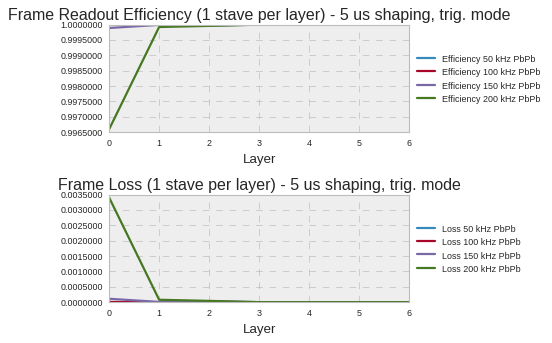

In [236]:
#plt.style.use('seaborn-whitegrid')
plt.style.use('bmh')
fig, ax = plt.subplots(2)

ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.7f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.7f'))

width = 0.6       # the width of the bars: can also be len(x) sequence

plots_efficiency = dict()
plots_loss = dict()

for event_rate in sim_data_efficiency:
    list_efficiency_data = sorted(sim_data_efficiency[event_rate].items())
    list_loss_data = sorted(sim_data_loss[event_rate].items())

    layers, efficiency_data = zip(*list_efficiency_data)
    layers, loss_data = zip(*list_loss_data)
    
    print('layers: ', layers)
    print('efficiency_data:', efficiency_data)
    
    plots_efficiency[event_rate] = ax[0].plot(layers, efficiency_data, label='Efficiency ' + str(event_rate) + ' kHz ' + sim_type)
    plots_loss[event_rate] = ax[1].plot(layers, loss_data, label='Loss ' + str(event_rate) + ' kHz ' + sim_type)
    
additional_title = ''
if len(sim_additional_title) > 0:
    additional_title = ' - ' + sim_additional_title


ax[0].set_title('Frame Readout Efficiency (1 stave per layer)' + additional_title)
ax[0].set_xlabel('Layer')
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax[1].set_title('Frame Loss (1 stave per layer)' + additional_title)
ax[1].set_xlabel('Layer')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

if save_plots:
    fig.savefig(plot_output_dir + '/frame_efficiency_loss.png', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
    fig.savefig(plot_output_dir + '/frame_efficiency_loss.pdf', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
plt.close(fig)

# Plot Busy, Busy Violation, and Flush Incomplete counts

layers:  (0, 1, 2, 3, 4, 5, 6)
busy_data: (0, 0, 0, 0, 0, 0, 0)
busyv_data: (0, 0, 0, 0, 0, 0, 2)
flush_data: (0, 0, 0, 0, 0, 0, 0)
layers:  (0, 1, 2, 3, 4, 5, 6)
busy_data: (0, 0, 0, 0, 0, 0, 0)
busyv_data: (6, 1, 8, 0, 0, 0, 6)
flush_data: (0, 0, 0, 0, 0, 0, 0)
layers:  (0, 1, 2, 3, 4, 5, 6)
busy_data: (0, 0, 0, 0, 0, 0, 0)
busyv_data: (89, 8, 28, 10, 2, 6, 7)
flush_data: (0, 0, 0, 0, 0, 0, 0)
layers:  (0, 1, 2, 3, 4, 5, 6)
busy_data: (0, 0, 0, 0, 0, 0, 0)
busyv_data: (2597, 61, 33, 27, 5, 19, 19)
flush_data: (0, 0, 0, 0, 0, 0, 0)


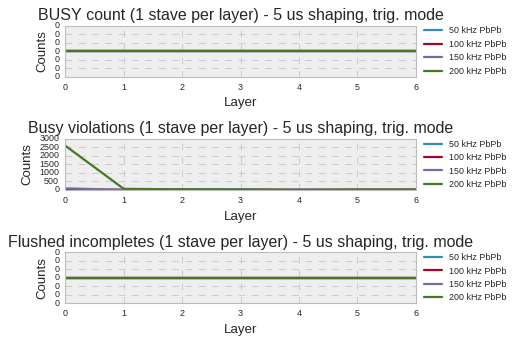

In [237]:
#plt.style.use('seaborn-whitegrid')
plt.style.use('bmh')
fig, ax = plt.subplots(3)

ax[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%d'))

plots_busy = dict()
plots_busyv = dict()
plots_flush = dict()

for event_rate in sim_data_busy:
    list_busy_data = sorted(sim_data_busy[event_rate].items())
    list_busyv_data = sorted(sim_data_busyv[event_rate].items())
    list_flush_data = sorted(sim_data_flush[event_rate].items())

    layers, busy_data = zip(*list_busy_data)
    layers, busyv_data = zip(*list_busyv_data)
    layers, flush_data = zip(*list_flush_data)
    
    print('layers: ', layers)
    print('busy_data:', busy_data)
    print('busyv_data:', busyv_data)
    print('flush_data:', flush_data)
    
    plots_busy[event_rate] = ax[0].plot(layers, busy_data, label=str(event_rate) + ' kHz ' + sim_type)
    plots_busyv[event_rate] = ax[1].plot(layers, busyv_data, label=str(event_rate) + ' kHz ' + sim_type)
    plots_flush[event_rate] = ax[2].plot(layers, flush_data, label=str(event_rate) + ' kHz ' + sim_type)

ax[0].set_title('BUSY count (1 stave per layer)' + additional_title)
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Layer')
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_title('Busy violations (1 stave per layer)' + additional_title)
ax[1].set_ylabel('Counts')
ax[1].set_xlabel('Layer')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2].set_title('Flushed incompletes (1 stave per layer)' + additional_title)
ax[2].set_ylabel('Counts')
ax[2].set_xlabel('Layer')
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

if save_plots:
    fig.savefig(plot_output_dir + '/busy_busyv_flush.png', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
    fig.savefig(plot_output_dir + '/busy_busyv_flush.pdf', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
plt.close(fig)


# Plot Busy Alone

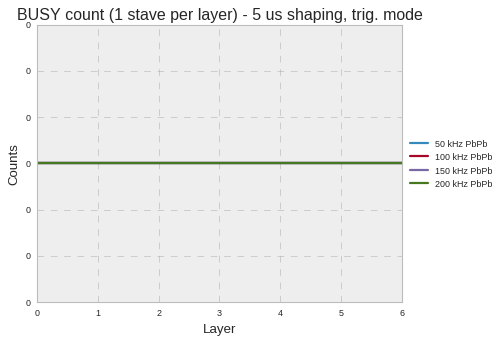

In [238]:
#plt.style.use('seaborn-whitegrid')
plt.style.use('bmh')
fig, ax = plt.subplots(1)

ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plots_busy = dict()

for event_rate in sim_data_busy:
    list_busy_data = sorted(sim_data_busy[event_rate].items())
    layers, busy_data = zip(*list_busy_data)
    
    plots_busy[event_rate] = plt.plot(layers, busy_data, label=str(event_rate) + ' kHz ' + sim_type)

plt.title('BUSY count (1 stave per layer)' + additional_title)
plt.ylabel('Counts')
plt.xlabel('Layer')
#plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

if save_plots:
    fig.savefig(plot_output_dir + '/busy.png', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
    fig.savefig(plot_output_dir + '/busy.pdf', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
plt.close(fig)

# Plot Busy Violations Alone

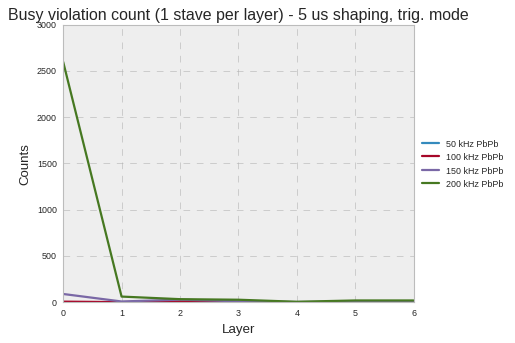

In [239]:
#plt.style.use('seaborn-whitegrid')
plt.style.use('bmh')
fig, ax = plt.subplots(1)

ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plots_busyv = dict()

for event_rate in sim_data_busyv:
    list_busyv_data = sorted(sim_data_busyv[event_rate].items())
    layers, busyv_data = zip(*list_busyv_data)

    plots_busyv[event_rate] = plt.plot(layers, busyv_data, label=str(event_rate) + ' kHz ' + sim_type)

plt.title('Busy violation count (1 stave per layer)' + additional_title)
plt.ylabel('Counts')
plt.xlabel('Layer')
#plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()

if save_plots:
    fig.savefig(plot_output_dir + '/busyv.png', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
    fig.savefig(plot_output_dir + '/busyv.pdf', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
plt.close(fig)

# Plot Flushed Incomplete Alone

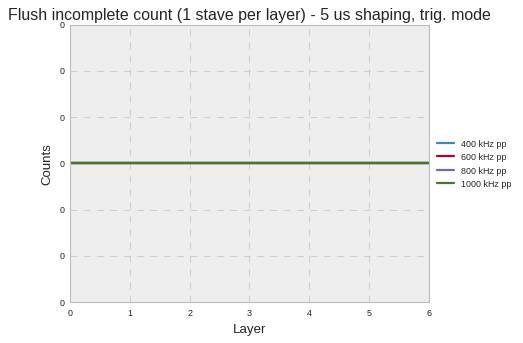

In [234]:
#plt.style.use('seaborn-whitegrid')
plt.style.use('bmh')
fig, ax = plt.subplots(1)

ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plots_flush = dict()

for event_rate in sim_data_flush:
    list_flush_data = sorted(sim_data_flush[event_rate].items())
    layers, flush_data = zip(*list_flush_data)
    
    plots_flush[event_rate] = plt.plot(layers, flush_data, label=str(event_rate) + ' kHz ' + sim_type)

plt.title('Flush incomplete count (1 stave per layer)' + additional_title)
plt.ylabel('Counts')
plt.xlabel('Layer')
#plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

if save_plots:
    fig.savefig(plot_output_dir + '/flush.png', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
    fig.savefig(plot_output_dir + '/flush.pdf', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
plt.close(fig)